In [2]:
import healpy as hp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy.table import Table, Column, MaskedColumn
from astropy.table import QTable
import astropy.units as u
import astropy.coordinates as coord
from astropy.constants import c as c

In [6]:
ra = np.random.uniform(0., 360, 100)
dec = np.random.uniform(-90., 90., 100)

In [7]:
help(hp.projscatter)

Help on function projscatter in module healpy.visufunc:

projscatter(*args, **kwds)
    Projscatter is a wrapper around :func:`matplotlib.Axes.scatter` to take into account the
    spherical projection.
    
    You can call this function as::
    
       projscatter(theta, phi)     # plot points at coord (theta, phi)
       projplot(thetaphi)          # plot points at coord (thetaphi[0], thetaphi[1])
    
    Parameters
    ----------
    theta, phi : float, array-like
      Coordinates of point to plot. Can be put into one 2-d array, first line is
      then *theta* and second line is *phi*. See *lonlat* parameter for unit.
    lonlat : bool, optional
      If True, theta and phi are interpreted as longitude and latitude
      in degree, otherwise, as colatitude and longitude in radian
    coord : {'E', 'G', 'C', None}, optional
      The coordinate system of the points, only used if the coordinate
      coordinate system of the axes has been defined and in this
      case, a rotatio

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


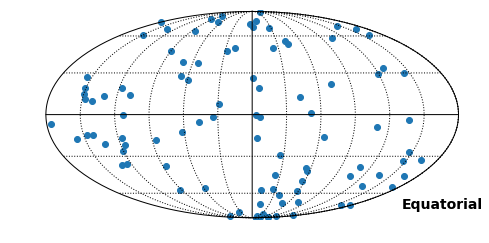

In [8]:
hp.graticule(coord='C')
hp.projscatter(dec, ra, lonlat=True, coord='C')

In [9]:
# Make coordinates along Galactic Plane and plot in equatorial.
b = np.zeros(1000, dtype=float)
l = np.random.uniform(-180., 180., len(b))

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


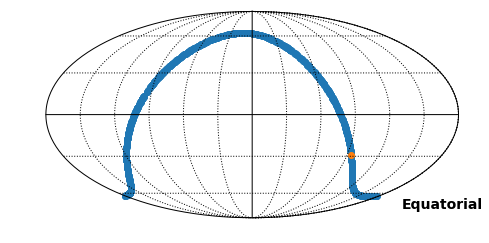

In [10]:
hp.graticule(coord='C')
hp.projscatter(l, b, lonlat=True, coord='GC')
hp.projscatter(0., 0., lonlat=True, coord='GC')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


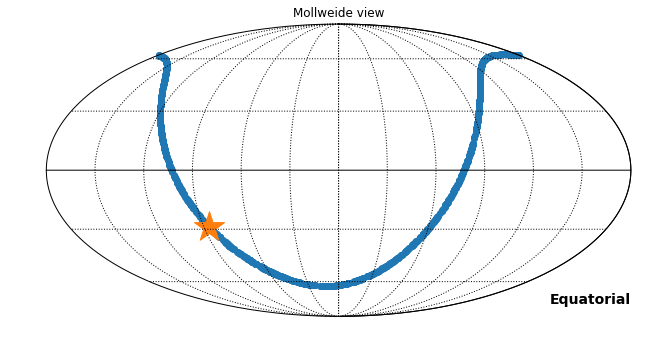

In [11]:
# Begin hack here:
# Create a fake map, plot in mollweide projection, set the map to 1 except for one pixel at the N. Pole.
# Use a gray colormap so that all the pixels look white.
nside = 32
npix = hp.nside2npix(nside)
skymap = np.ones(npix)
skymap[0] = 0.

# Plot the dummy skymap.
# Use flip='astro' and rot=180 so that 0 is on the right, and 360 in RA is on the left.
hp.mollview(skymap, coord='C', flip='astro', rot=180, cmap='gray', cbar=False)
hp.graticule()

# Actually plot your stuff here.
hp.projscatter(l, b, lonlat=True, coord='GC')

# Galactic center.
hp.projscatter(0., 0., lonlat=True, coord='GC', marker='*', s=1000)

In [12]:
help(hp.mollview)

Help on function mollview in module healpy.visufunc:

mollview(map=None, fig=None, rot=None, coord=None, unit='', xsize=800, title='Mollweide view', nest=False, min=None, max=None, flip='astro', remove_dip=False, remove_mono=False, gal_cut=0, format='%g', format2='%g', cbar=True, cmap=None, notext=False, norm=None, hold=False, margins=None, sub=None, nlocs=2, return_projected_map=False)
    Plot a healpix map (given as an array) in Mollweide projection.
    
    Parameters
    ----------
    map : float, array-like or None
      An array containing the map, supports masked maps, see the `ma` function.
      If None, will display a blank map, useful for overplotting.
    fig : int or None, optional
      The figure number to use. Default: create a new figure
    rot : scalar or sequence, optional
      Describe the rotation to apply.
      In the form (lon, lat, psi) (unit: degrees) : the point at
      longitude *lon* and latitude *lat* will be at the center. An additional rotation
   

In [13]:
mw_table = Table.read('/home/kdauer2/mollweide_coords.txt', format='ascii.commented_header')

In [14]:
ra = mw_table['ra']
dec = mw_table['dec']

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


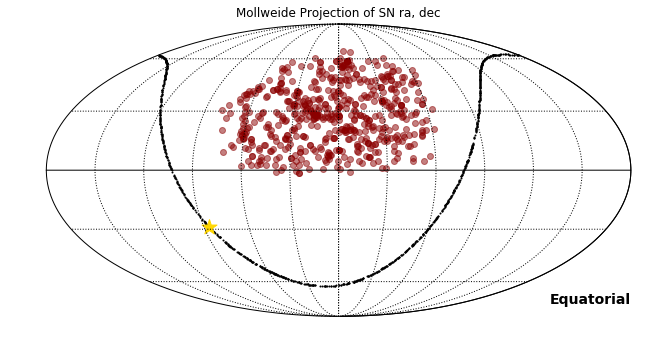

In [20]:
# Begin hack here:
# Create a fake map, plot in mollweide projection, set the map to 1 except for one pixel at the N. Pole.
# Use a gray colormap so that all the pixels look white.
nside = 32
npix = hp.nside2npix(nside)
skymap = np.ones(npix)
skymap[0] = 0.

# Plot the dummy skymap.
# Use flip='astro' and rot=180 so that 0 is on the right, and 360 in RA is on the left.
hp.mollview(skymap, coord='C', flip='astro', rot=180, cmap='gray', cbar=False, title='Mollweide Projection of SN ra, dec')
hp.graticule()

# Actually plot your stuff here.
hp.projscatter(ra, dec, lonlat=True, coord='C', color='darkred', alpha=0.5)
hp.projscatter(l, b, lonlat=True, coord='GC', color = 'black', s=1)

# Galactic center.
hp.projscatter(0., 0., lonlat=True, coord='GC', marker='*', s=250, color='gold')

In [16]:
# plt.plot(ra, dec, 'o')

In [17]:
Kmw_table = Table.read('/home/kdauer2/k_mollwCoords.txt', format='ascii.commented_header')

In [18]:
Kra = Kmw_table['ra']
Kdec = Kmw_table['dec']

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


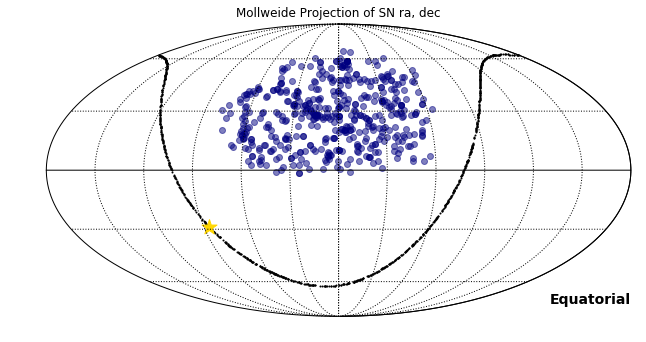

In [26]:
# Begin hack here:
# Create a fake map, plot in mollweide projection, set the map to 1 except for one pixel at the N. Pole.
# Use a gray colormap so that all the pixels look white.
nside = 32
npix = hp.nside2npix(nside)
skymap = np.ones(npix)
skymap[0] = 0.

# Plot the dummy skymap.
# Use flip='astro' and rot=180 so that 0 is on the right, and 360 in RA is on the left.
hp.mollview(skymap, coord='C', flip='astro', rot=180, cmap='gray', cbar=False, title='Mollweide Projection of SN ra, dec')
hp.graticule()

# Actually plot your stuff here.
hp.projscatter(Kra, Kdec, lonlat=True, coord='C', color='navy', alpha=0.5)
hp.projscatter(l, b, lonlat=True, coord='GC', color = 'black', s=1)

# Galactic center.
hp.projscatter(0., 0., lonlat=True, coord='GC', marker='*', s=250, color='gold')